In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pickle

In [ ]:
def read_data(file_path = "activity_context_tracking_data.csv"):
    df = pd.read_csv(file_path)
    return df

In [ ]:
df = read_data()

In [ ]:
def explore_data(df):
    # Exploring a random sample of data
    sample = df.sample(10)
    print(sample)

    # Just a peek into the data statistics
    description = df.describe()
    print("\nDescription")
    print(description)

    # Viewing the number of columns and rows
    shape = df.shape
    print("\nShape")
    print(shape)

    # Checking for null values
    null_counts = df.isnull().sum()
    print("\nNull value count")
    print(null_counts)

    # Information about the data
    print("\nInfo")
    info = df.info()
    print(info)
explore_data(df)


Description
                 _id            orX            orY            orZ  \
count  205520.000000  205520.000000  205520.000000  205520.000000   
mean   102760.500000     189.455094       2.726547       0.414120   
std     59328.657999      80.359907      22.446067      12.438395   
min         1.000000       0.000000    -178.000000     -86.000000   
25%     51380.750000     139.000000      -3.000000      -3.000000   
50%    102760.500000     186.000000       6.000000      -1.000000   
75%    154140.250000     268.000000      18.000000       3.000000   
max    205520.000000     359.000000     169.000000      88.000000   

                  rX             rY             rZ           accX  \
count  205520.000000  205520.000000  205520.000000  205520.000000   
mean       -0.017598      -0.011672       0.038061       0.095601   
std         0.148930       0.113509       0.791781       1.948063   
min        -0.712191      -0.556955      -0.999912     -19.536700   
25%        -0.094141

In [ ]:
def drop_columns(df):
    df = df.drop("_id", axis=1)
    return df
df = drop_columns(df)

In [ ]:
def duplicate_rows(df):
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")

In [ ]:
duplicate_rows(df)

Number of duplicate rows: 70469


In [ ]:
def descriptive_statistics(df):
    mean = df.mean(numeric_only=True)
    median = df.median(numeric_only=True)
    std = df.std(numeric_only=True)
    var = df.var(numeric_only=True)
    min_val = df.min(numeric_only=True)
    max_val = df.max(numeric_only=True)
    skew = df.skew(numeric_only=True)
    kurt = df.kurt(numeric_only=True)

    # Combine all statistics into a single dataframe
    df_stats = pd.DataFrame({'Mean': mean, 'Median': median, 'Std Dev': std, 'Variance': var,
                             'Minimum': min_val, 'Maximum': max_val, 'Skewness': skew, 'Kurtosis': kurt})

    # Print the results as a table
    print('Descriptive Statistics:\n')
    print(df_stats.to_string())

In [ ]:
descriptive_statistics(df)

Descriptive Statistics:

                   Mean       Median      Std Dev      Variance     Minimum       Maximum  Skewness   Kurtosis
orX          189.455094   186.000000    80.359907  6.457715e+03    0.000000    359.000000 -0.253970  -0.717225
orY            2.726547     6.000000    22.446067  5.038259e+02 -178.000000    169.000000 -3.340166  18.422336
orZ            0.414120    -1.000000    12.438395  1.547137e+02  -86.000000     88.000000  2.164458  14.563231
rX            -0.017598    -0.027313     0.148930  2.218000e-02   -0.712191      0.804160  2.293412  11.351452
rY            -0.011672    -0.011470     0.113509  1.288433e-02   -0.556955      0.723168  0.438571   4.260872
rZ             0.038061     0.491602     0.791781  6.269170e-01   -0.999912      0.999904 -0.163208  -1.731809
accX           0.095601     0.076615     1.948063  3.794951e+00  -19.536700     15.859200  1.656716  11.108284
accY          -0.973535    -1.072600     2.484468  6.172580e+00  -14.480100     19.5750

In [ ]:
def histograms(df):
    df.hist(figsize=(20, 12), bins=20)
    plt.suptitle("Frequency distribution Histograms")
    plt.show()

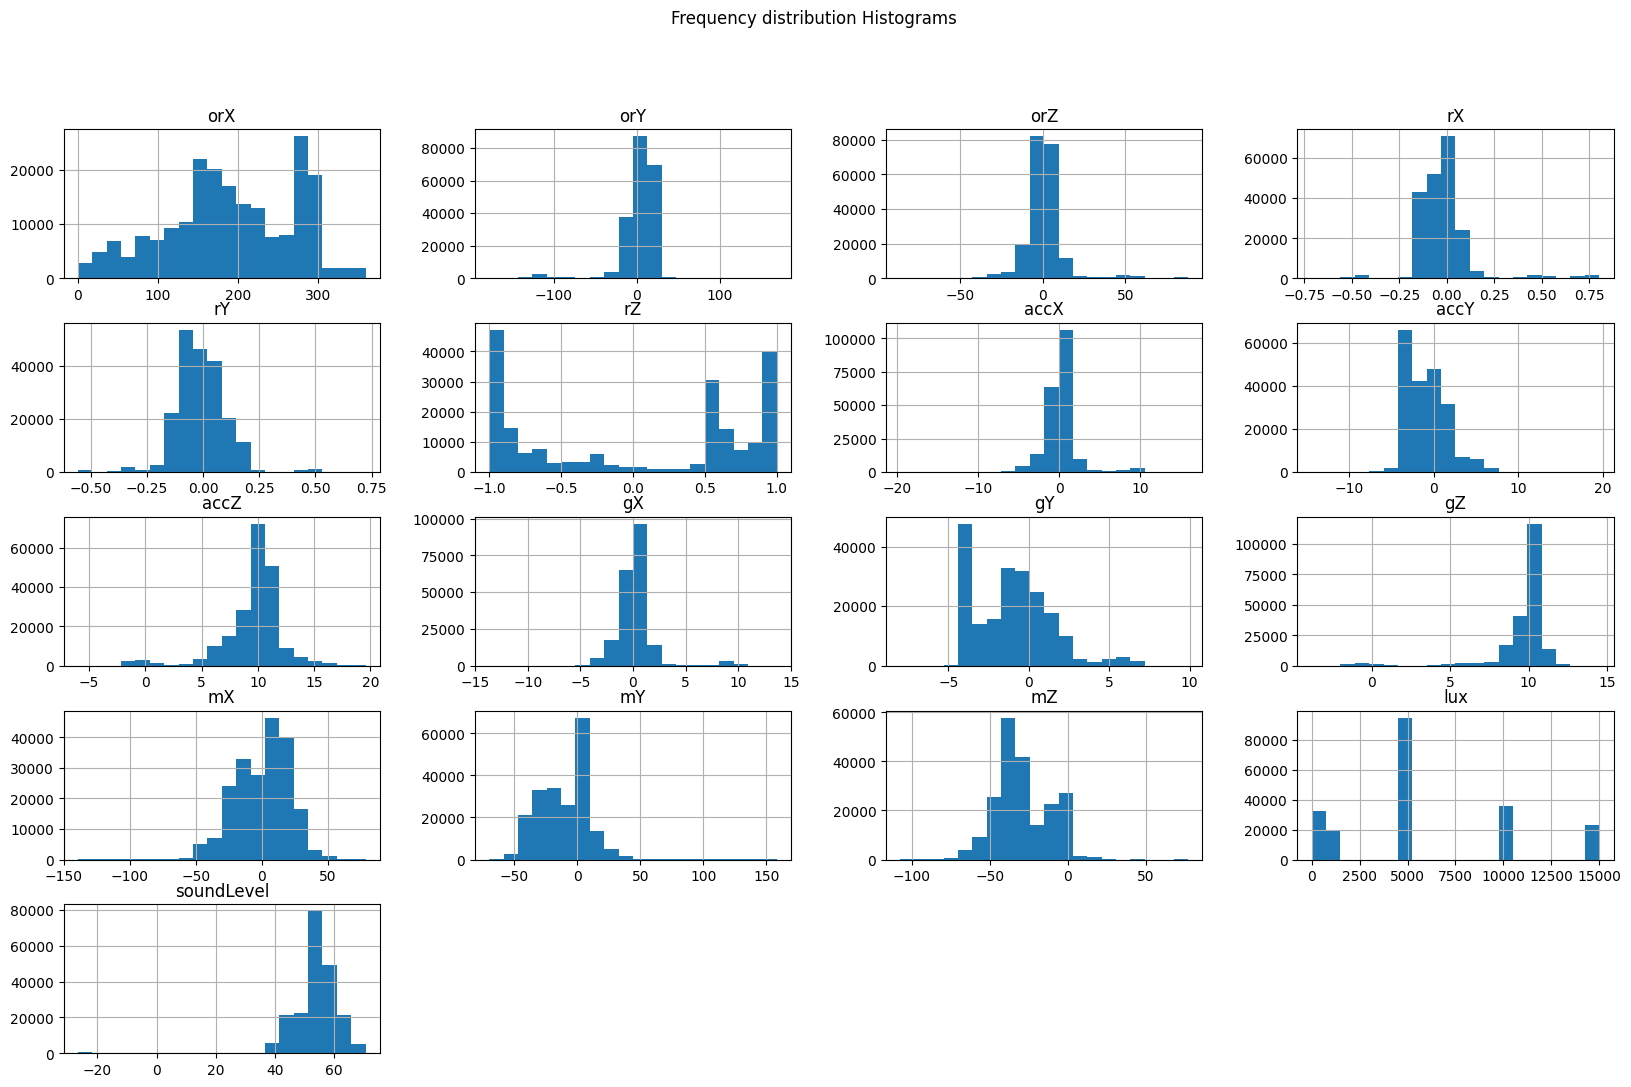

In [ ]:
histograms(df)

In [ ]:
def correlation_heatmap(df):
    df_corr = df.corr()
    plt.figure(figsize=(16, 8))
    plt.title('Correlation Heatmap')
    sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    plt.show()

<ipython-input-13-0fe47735fa69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


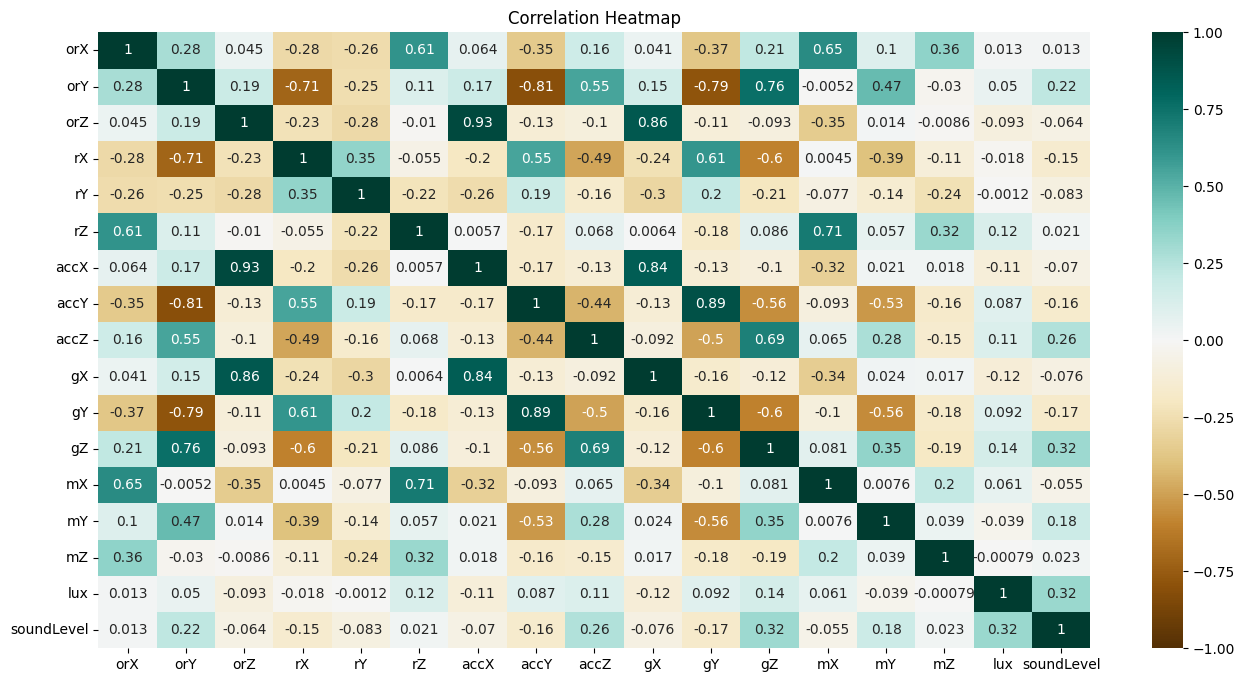

In [ ]:
correlation_heatmap(df)

In [ ]:
def variable_dependency(df):
    plt.figure(figsize=(10, 6))
    plt.title('Variable Dependency')
    sns.scatterplot(x='orZ', y='accX', hue='activity', data=df)
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


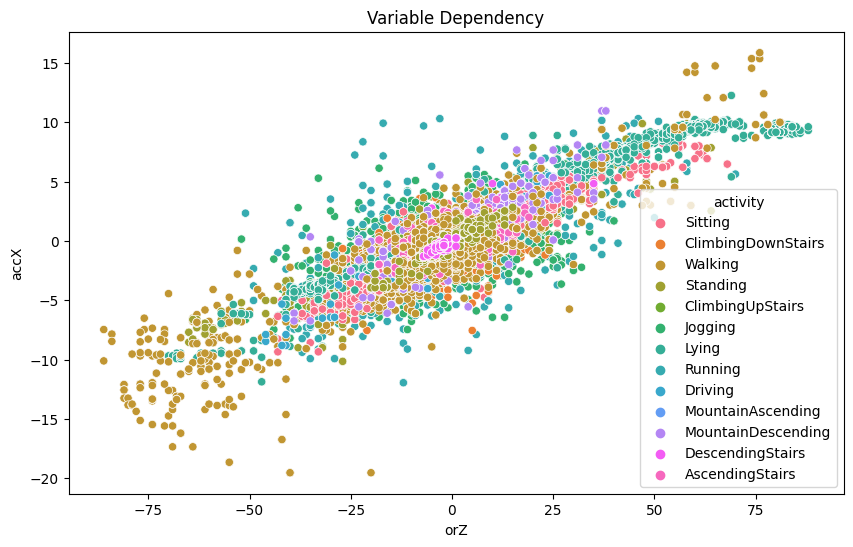

In [ ]:
variable_dependency(df)

In [ ]:
def activity_frequency_distribution(df):
    activity_count = df.groupby('activity').count()
    plt.figure(figsize=(24, 8))
    plt.title('Frequency Distribution of Activity before oversampling')
    sns.countplot(x=df['activity'])
    plt.show()

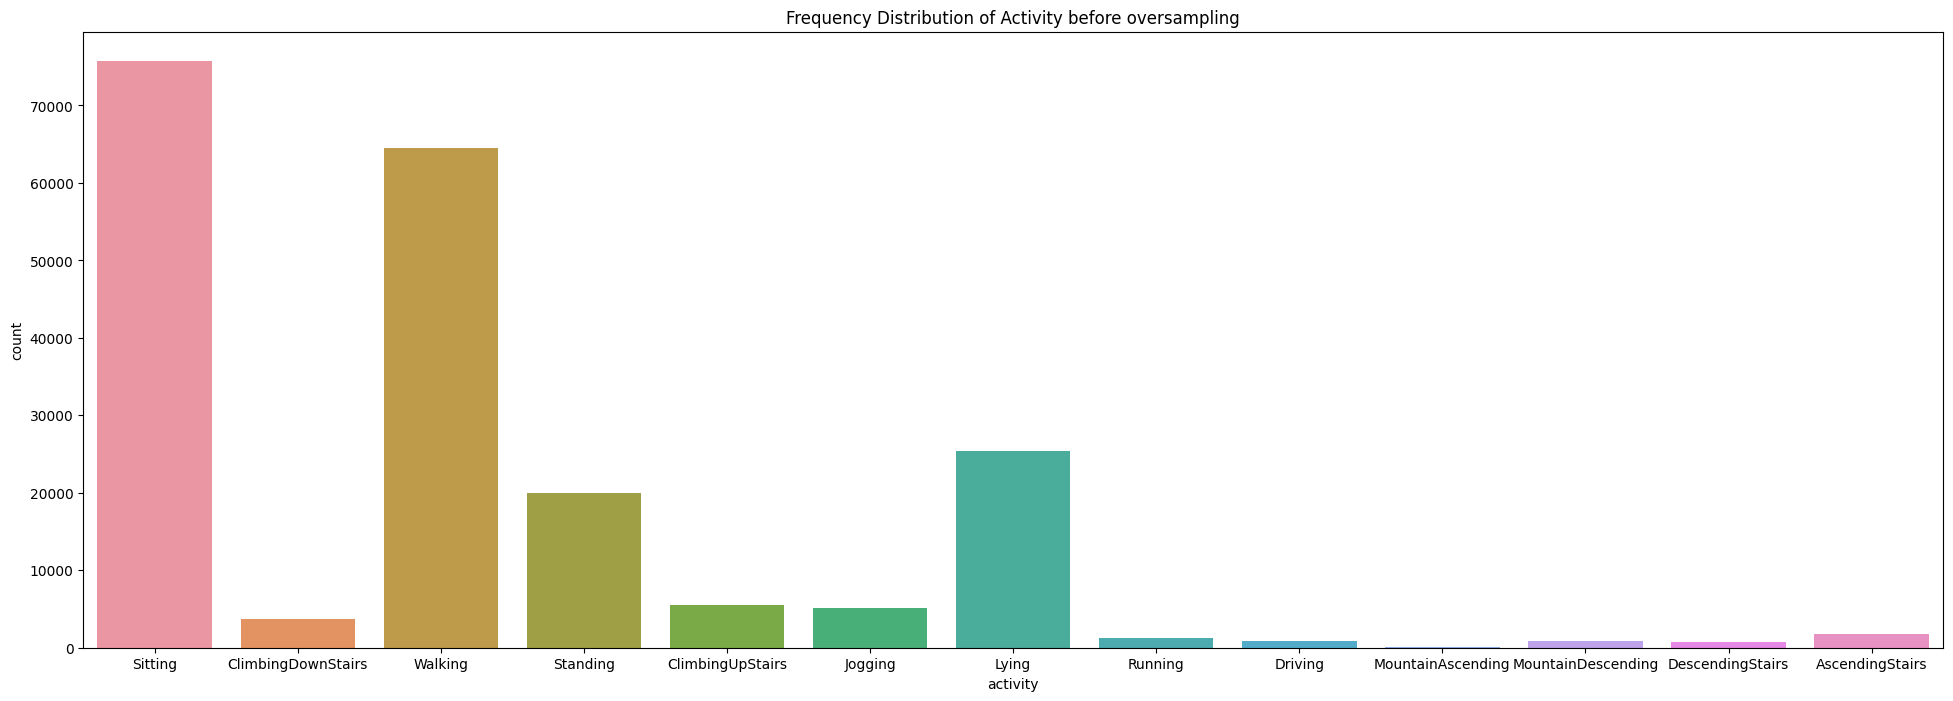

In [ ]:
activity_frequency_distribution(df)

In [ ]:
def oversampling(df):
    x = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    smote = SMOTE()
    x_resampled, y_resampled = smote.fit_resample(x, y)

    print(x_resampled.shape)
    print(y_resampled.shape)

    return x_resampled, y_resampled
x_resampled, y_resampled = oversampling(df)

(984529, 17)
(984529,)


In [ ]:
def resampled_activity_freq(y_resampled):
    yo_count_pd = pd.Series(y_resampled)
    yo_count = yo_count_pd.value_counts()

    plt.figure(figsize=(24, 8))
    plt.title('Count of Activity after Resampling SMOTE')
    sns.countplot(x=yo_count_pd)
    plt.show()

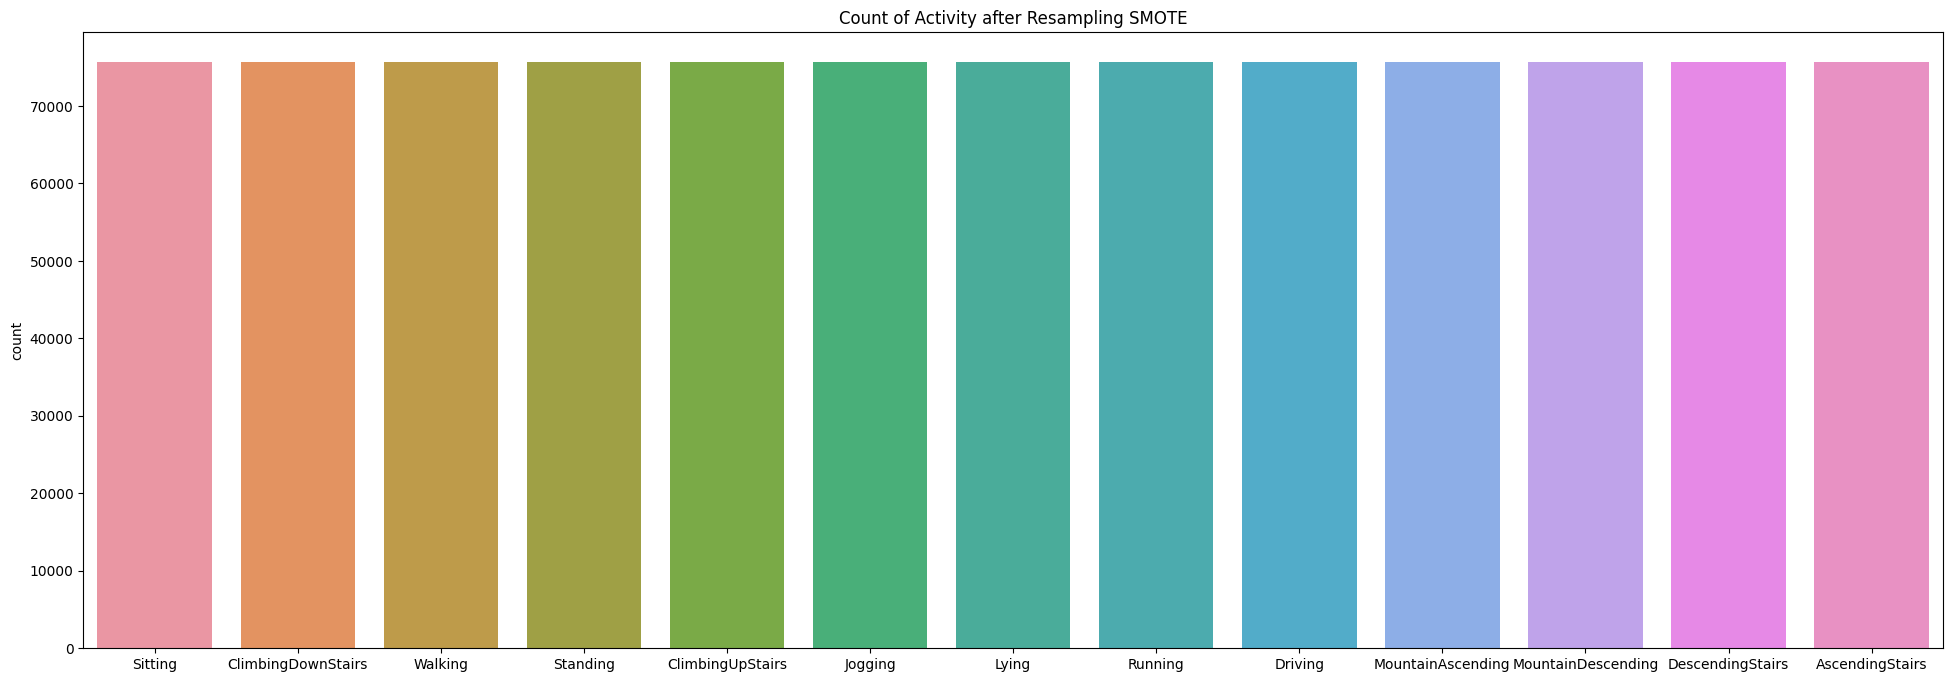

In [ ]:
resampled_activity_freq(y_resampled)

In [ ]:
def split_data(x_resampled, y_resampled):
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test


In [ ]:
x_train, x_test, y_train, y_test = split_data(x_resampled, y_resampled)

In [ ]:
def scale_data(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    return x_train_scaled, x_test_scaled

In [ ]:
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

In [ ]:
def load_model(file_path):
    return pickle.load(open(file_path, 'rb'))

In [ ]:
def save_model(model, file_path):
    pickle.dump(model, open(file_path, 'wb'))

In [ ]:
def random_forest_classifier(x_train_scaled, y_train):
    rfc = RandomForestClassifier(random_state=42)
    rfc_model = rfc.fit(x_train_scaled, y_train)
    return rfc_model

In [ ]:
 rfc_model = random_forest_classifier(x_train_scaled, y_train)

In [ ]:
save_model(rfc_model, 'rfc_model.pkl')

In [ ]:
pickled_rfc_model = load_model('rfc_model.pkl')

In [ ]:
def svm_classifier(x_train_scaled, y_train):
    svm = SVC()
    svm_model = svm.fit(x_train_scaled, y_train)
    return svm_model

In [ ]:
svm_model = svm_classifier(x_train_scaled, y_train)

In [ ]:
save_model(svm_model, 'svm_model.pkl')

In [ ]:
pickled_svm_model = load_model('svm_model.pkl')

In [ ]:
def mlp_classifier(x_train_scaled, y_train):
    mlp = MLPClassifier(random_state=42, max_iter=200)
    mlp_model = mlp.fit(x_train_scaled, y_train)
    return mlp_model

In [ ]:
mlp_model = mlp_classifier(x_train_scaled, y_train)

In [ ]:
save_model(mlp_model, 'mlp_model.pkl')

In [ ]:
pickled_mlp_model = load_model('mlp_model.pkl')

In [ ]:
def evaluate_classifier(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

                    precision    recall  f1-score   support

   AscendingStairs       1.00      1.00      1.00     22890
ClimbingDownStairs       1.00      1.00      1.00     22477
  ClimbingUpStairs       1.00      1.00      1.00     22984
  DescendingStairs       1.00      1.00      1.00     22548
           Driving       1.00      1.00      1.00     22635
           Jogging       1.00      1.00      1.00     22774
             Lying       1.00      1.00      1.00     22685
 MountainAscending       1.00      0.95      0.97     22760
MountainDescending       0.95      1.00      0.97     22698
           Running       1.00      1.00      1.00     22656
           Sitting       1.00      1.00      1.00     22657
          Standing       1.00      1.00      1.00     22806
           Walking       1.00      1.00      1.00     22789

          accuracy                           1.00    295359
         macro avg       1.00      1.00      1.00    295359
      weighted avg       1.00      1.0

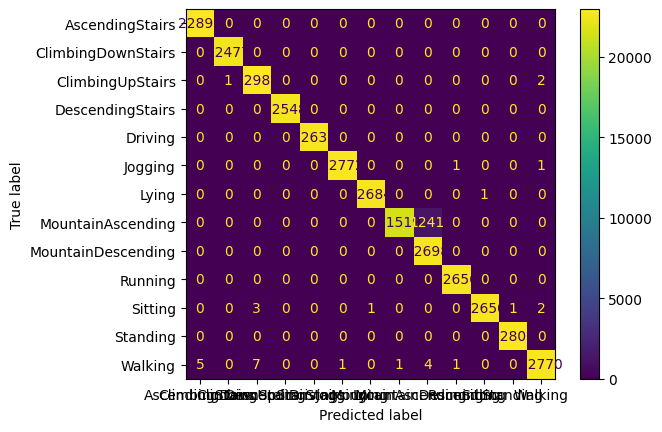

In [ ]:
evaluate_classifier(y_test, rfc_model.predict(x_test_scaled))

                    precision    recall  f1-score   support

   AscendingStairs       0.98      1.00      0.99     22890
ClimbingDownStairs       0.97      0.99      0.98     22477
  ClimbingUpStairs       0.97      0.98      0.97     22984
  DescendingStairs       1.00      1.00      1.00     22548
           Driving       1.00      1.00      1.00     22635
           Jogging       0.98      0.99      0.99     22774
             Lying       1.00      1.00      1.00     22685
 MountainAscending       0.99      1.00      1.00     22760
MountainDescending       0.99      1.00      0.99     22698
           Running       1.00      1.00      1.00     22656
           Sitting       1.00      0.97      0.98     22657
          Standing       0.98      0.99      0.99     22806
           Walking       0.99      0.93      0.96     22789

          accuracy                           0.99    295359
         macro avg       0.99      0.99      0.99    295359
      weighted avg       0.99      0.9

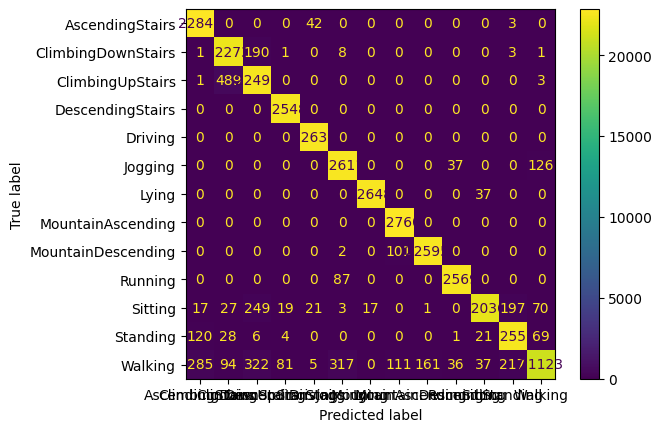

In [ ]:
evaluate_classifier(y_test, svm_model.predict(x_test_scaled))

                    precision    recall  f1-score   support

   AscendingStairs       1.00      1.00      1.00     22890
ClimbingDownStairs       1.00      1.00      1.00     22477
  ClimbingUpStairs       1.00      1.00      1.00     22984
  DescendingStairs       1.00      1.00      1.00     22548
           Driving       1.00      1.00      1.00     22635
           Jogging       1.00      1.00      1.00     22774
             Lying       1.00      1.00      1.00     22685
 MountainAscending       1.00      1.00      1.00     22760
MountainDescending       1.00      1.00      1.00     22698
           Running       1.00      1.00      1.00     22656
           Sitting       1.00      1.00      1.00     22657
          Standing       1.00      1.00      1.00     22806
           Walking       1.00      0.98      0.99     22789

          accuracy                           1.00    295359
         macro avg       1.00      1.00      1.00    295359
      weighted avg       1.00      1.0

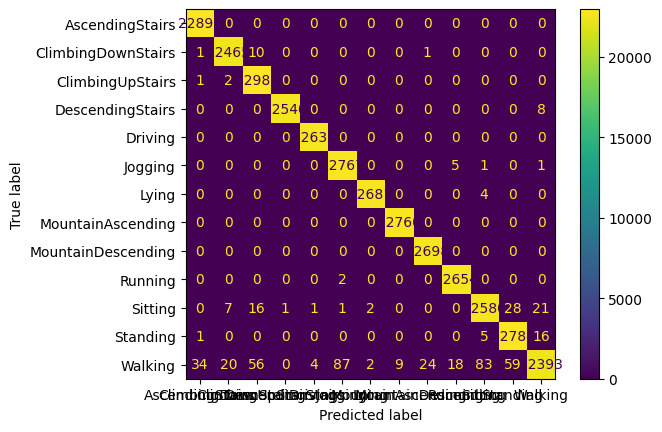

In [ ]:
evaluate_classifier(y_test, mlp_model.predict(x_test_scaled))

In [ ]:
save_model(rfc_model, 'rfc_model.pkl')
save_model(svm_model, 'svm_model.pkl')
save_model(mlp_model, 'mlp_model.pkl')

In [ ]:
pickled_rfc_model = load_model('rfc_model.pkl')
pickled_svm_model = load_model('svm_model.pkl')
pickled_mlp_model = load_model('mlp_model.pkl')

In [ ]:
pickled_rfc_model.predict(x_test_scaled)

array(['AscendingStairs', 'ClimbingUpStairs', 'Sitting', ...,
       'DescendingStairs', 'Walking', 'MountainAscending'], dtype=object)

In [ ]:
pickled_svm_model.predict(x_test_scaled)

array(['AscendingStairs', 'ClimbingUpStairs', 'Sitting', ...,
       'DescendingStairs', 'Walking', 'MountainAscending'], dtype=object)

In [ ]:
pickled_mlp_model.predict(x_test_scaled)

array(['AscendingStairs', 'ClimbingUpStairs', 'Sitting', ...,
       'DescendingStairs', 'Walking', 'MountainAscending'], dtype='<U18')